# Machine Learning Assignment 1:  Linear regression to predict water temperature
## Submission by: Mark Preston

### Loading data

This week, I'll be using linear regression to predict water temperatures. The assignment will include an exploratory data analysis alongside modelling work. Here, the linear model will be developed using a manual approach as well as with Sci-Kit Learn. To begin though, I'm loading the required data. The necessary packages for the analysis will be loaded in the appropriate section.

In [2]:
import pandas as pd

pd.options.mode.chained_assignment = None

water_data = pd.read_csv("bottle.csv", low_memory=False)

### Part A: Data Cleaning & Exploratory Analysis

With the data loaded, the analysis cna proceed. In this section, I'll perform some basic data hygeine and explore the variables as well.

#### Verify the shape of the data

the shape can be reviewed using the `shape` function, which returns the data frame's dimensions by row and column numbers. As seen below, there are 864,63 rows with 74 columns. This matches the given assignment dimensions.

In [3]:
print("Data set has", water_data.shape[0], "rows and", water_data.shape[1], "columns")

Data set has 864863 rows and 74 columns


#### For the full dataset, remove all NaN and NA values

To review if the data set has any missing values, I've summed all the nulls per column. Following this, I've filtered out variables without any missing values to better understand the set's completeness. As seen below, there are 66 columns with at least some nulls. 

In [4]:
null_values = water_data.isnull().sum()

print("Columns with at least 1 null value:", len(null_values[null_values > 0]))

Columns with at least 1 null value: 66


Not all these columns are needed though, so I've reduced the set to include the two main predictors- Salnty STheta- and the outcome variable temperature as well. Following this, I've checked to see if these columns have any null values. Since all three have some nulls, these rows need to be dropped. 

In [5]:
water_explore = water_data[["Salnty", "STheta", "T_degC"]]

pd.DataFrame({"is_null_count": water_explore.isnull().sum()})

,is_null_count
Salnty,47354
STheta,52689
T_degC,10963


Using `dropna`, I've dropped the missing values here. The new dimensions are listed below, which match the assignment values. 

In [6]:
water_explore = water_explore.dropna()

print("The cleaned data now has", water_explore.shape[0], "rows and", water_explore.shape[1], "columns. First 10 rows shown below:")
water_explore.head(10)

The cleaned data now has 812174 rows and 3 columns. First 10 rows shown below:


,Salnty,STheta,T_degC
0,33.440,25.649,10.50
1,33.440,25.656,10.46
2,33.437,25.654,10.46
3,33.420,25.643,10.45
4,33.421,25.643,10.45
5,33.431,25.651,10.45
6,33.440,25.658,10.45
7,33.424,25.682,10.24
8,33.420,25.710,10.06
9,33.494,25.801,9.86


#### Build scatterplots for Salnty vs T_degC and Salnty vs T_degC and STheta vs T_degC using Matplotlib

Getting into the exploratory analysis, I'll start reviewing the relationship between both predictors and temperature. Prior to that though, I've used the pairplot from Seaborn to evaluate the univariate and bivariate relationships found in the set. One of the things that sticks out to me are what appear to be outliers in STheta.

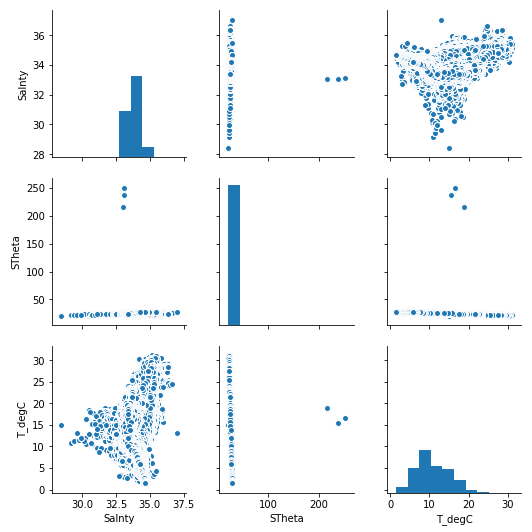

In [8]:
import seaborn as sns

sns.pairplot(water_explore)

To review the relationships in greater depth, I've included the individual scatterplots here. There does not appear to be any strong linear relationship between the two variables but, a medium negative correlation may exist. This will be further verified using the regression modelling.

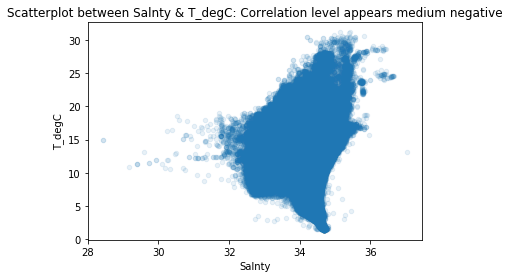

In [9]:
import matplotlib.pyplot as plt

water_explore.plot(kind="scatter", x="Salnty", y="T_degC", alpha=.1,
                   title="Scatterplot between Salnty & T_degC: Correlation level appears medium negative")

The scatterplot between STheta and T_degC reaffirms what was evident in the pairs plot: STheta has several outliers. There appears to be more than 3 given the point furthest left shows signs of having a few entries stacked (seen by the darker outline). These points will be removed following the initial plotting work.

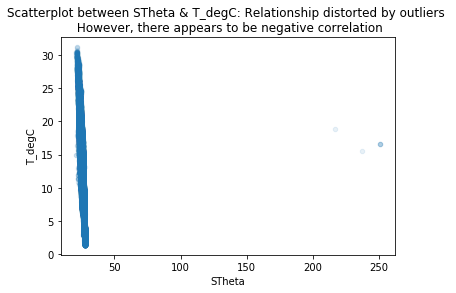

In [10]:
water_explore.plot(kind="scatter", x="STheta", y="T_degC", alpha=.1,
                   title="Scatterplot between STheta & T_degC: Relationship distorted by outliers \n However, there appears to be negative correlation")

#### Build Distribution of T_degC using Seaborn

Moving back to a focus on the outcome variable, I've included a histogram with density line below. The distribution is positively skewed with a mode around 9. The values extend to around 31 or so in the far right tail but, the large concentration of points is much lower.

Text(0.5,1,'Histogram for Temperature: Distribution is positively skewed')

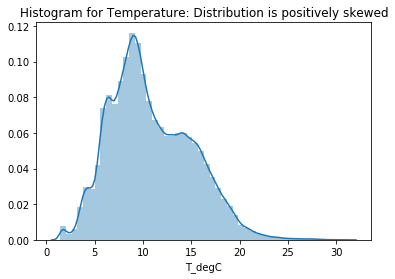

In [14]:
sns.distplot(water_explore["T_degC"]).set_title("Histogram for Temperature: Distribution is positively skewed")

To add some more depth on the distribution review, I've used `describe` below. The mean here is 10.8 degrees celsius, which means the median is likely down towards 10. As another interesting point, the 75th percent quantile goes up to about 14 degrees which highlights the high concentration of entries in the middle teens and below.

In [372]:
pd.DataFrame(data=water_explore["T_degC"].describe())

,T_degC
count,812168.000000
mean,10.847859
std,4.220989
min,1.440000
25%,7.750000
50%,10.100000
75%,13.910000
max,31.140000


#### Remove obvious outliers for STheta

Several outliers were identified during the exploratory work that need to be removed. To do so, I've developed a boolean logic that identifies values less than 100. By subtracting the number of true instances from the total number of rows in the set, the total outlier number can be derived.

In [11]:
outlier_identify = water_explore["STheta"] < 100

print("Number of outliers identified in STheta:", water_explore.shape[0] - outlier_identify.sum())

Number of outliers identified in STheta: 6


Using this new boolean object, the data set can be filtered. Here, all the values marked as true are kept while the 6 outliers are removed. The new set dimensions are listed below, which match the assignment values. 

In [12]:
water_explore = water_explore[outlier_identify]

print("Data set has", water_explore.shape[0], "rows and", water_explore.shape[1], "columns following outlier removal")

Data set has 812168 rows and 3 columns following outlier removal


#### Plot STheta again following outlier removal. Assess if the output appears better

When plotting STheta versus T_degC again, the relationship is much clearer. The outliers greatly distorted the linear relationship because they expanded the aspect ratio of the visualization so much. The max value below for STheta is around 29 but, the outliers were ten times that in some cases. Overall, this obfuscated the vast majority of the points in relation to temperature. Now, it's very clear there is a strong negative correlation. As temperature decreases, STheta steadily increases. Correlation is extremely important to understand because it is central to a regression model. This plot highlights that STheta is likely a significant predictor of temperature, which should show up as a negative beta in the modelling phase.

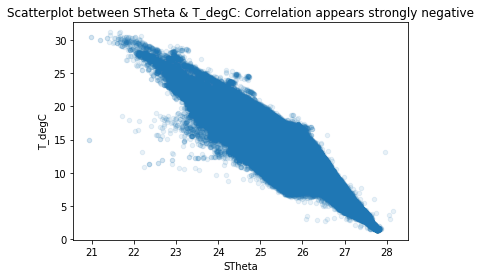

In [13]:
water_explore.plot(kind="scatter", x="STheta", y="T_degC", alpha=.1,
                   title="Scatterplot between STheta & T_degC: Correlation appears strongly negative")

As a final exploratory component, I've included a correlation matrix plot. I mentioned it was important to understand correlation between variables so I thought it was reasonable to formalize that line of inquiry here. The strong negative correlation between temperature and STheta is quantified here with the coefficient being around -.9. Additionally, the negative relationship between Salnty and temperature is around -.5, which is lower than I would have expected. Given this, I expect both will be significant variables in the temperature model.

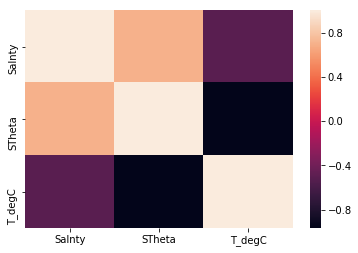

In [15]:
var_corr = water_explore.corr()

sns.heatmap(var_corr, 
            xticklabels=var_corr.columns.values,
            yticklabels=var_corr.columns.values)

### Part B: Train & Test Split

Moving into the modelling phase, I'll work towards setting up the data sets for the prediction task.

#### Conducting train and test split

Setting up the training and test set can be done efficiently using `train_test_split` from Sci-Kit Learn. To use the function, I've supplied the predictors and outcome variable as two seperate data frames, which are subsequently split into four new pandas objects. These are two predictor data frame for train and test as well as two for the outcome variable. This function utilizes a 75/25 split, which I've highlighted below.

In [16]:
from sklearn.model_selection import train_test_split

predictors = water_explore[["Salnty", "STheta"]]

outcome = water_explore[["T_degC"]]

X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, random_state=1017)

print(
"Training set rows:", X_train.shape[0], "which is", X_train.shape[0] / water_explore.shape[0] * 100, "percent of total records"
)

print(
"Test set rows:", X_test.shape[0], "which is", X_test.shape[0] / water_explore.shape[0] * 100, "percent of total records"
)

Training set rows: 609126 which is 75.0 percent of total records
Test set rows: 203042 which is 25.0 percent of total records


### Part C: Linear Regression Using Normal Equation


#### Build the normal equation using numpy & fit using your training data (X_train & y_train). Print out the coefficients

With the train and test split complete, I've constructed the normal equation using a series of numpy functions (found using the Hands On github). I developed a new data frame so an intercept column could be added without cluttering the initial training copy. The result below shows the regression coefficients derived from the approach. As seen, the coefficient for Salnty is about 3.17 while STheta is -5.04. The STheta value is more intuitive given the scatterploy showed a dramatic downward slope but, the Salnty value is more surprising. 

In [17]:
import numpy as np

X_b1 = X_train["STheta"]
X_b2 = X_train["Salnty"]
X_b = pd.concat([X_b1, X_b2], axis=1)
X_b["Intercept"] = np.ones(X_b1.shape[0])
X_b = X_b[["Intercept", "Salnty", "STheta"]]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

print("Intercept derived using normal equation:", theta_best[0])
print("Salnty slope coefficient derived using normal equation:", theta_best[1])
print("STheta slope coefficient derived using normal equation:", theta_best[2])

Intercept derived using normal equation: [35.73857973]
Salnty slope coefficient derived using normal equation: [3.10680145]
STheta slope coefficient derived using normal equation: [-5.03653468]


#### Predict T_degC for the test data using the fitted values from above

Staying with the manual approach, I've developed a prediction function that utilizes the coefficients from the previous step. The `manual_prediction` function operationalizes the liner regression equation, which is $Y = a + bX$. The function takes the intercept ($a$) from above which is then added to both slope coefficients ($b$) multiplied by the values for Salnty and STheta from the test set ($X$). The first five results are listed below.

In [18]:
def manual_predict(Salnty, STheta):
    fitted_value = theta_best[0] + (theta_best[1] * Salnty) + (theta_best[2] * STheta)
    return(fitted_value)

y_test["y_pred"] = manual_predict(Salnty=X_test["Salnty"], STheta=X_test["STheta"])

y_test.head()

,T_degC,y_pred
492273,4.21,5.090026
14726,15.61,16.161555
151483,10.34,10.163287
649612,17.20,17.357932
360161,12.13,11.541649


This also equivalent to taking the dot product of the matrix with regression coefficients and the test set. This implementation is shown below as well and the values match the function approach.

In [19]:
X_b1 = X_test["STheta"]
X_b2 = X_test["Salnty"]
X_b = pd.concat([X_b1, X_b2], axis=1)
X_b["Intercept"] = np.ones(X_b1.shape[0])
X_b = X_b[["Intercept", "Salnty", "STheta"]]

X_b["y_pred"] = X_b.dot(theta_best)

X_b.head()

,Intercept,Salnty,STheta,y_pred
492273,1.0,34.460,27.342,5.090026
14726,1.0,32.635,24.018,16.161555
151483,1.0,33.611,25.811,10.163287
649612,1.0,33.474,24.298,17.357932
360161,1.0,33.912,25.723,11.541649


#### Calculate the following for the test data: mean squared error, r-squared, and explained variance

Each evaluation metric is included below. All of them show the model has a very good fit with very accurate predictions. Statring with Mean Squared Error (MSE), a .23 indicates the the predictions are very close to the actuals. Zero is the ideal number here so it's about as low as you could reasonably expect. The $R^2$ is .987, which shows a very good fit. As a metric, $R^2$ = $1 - (SSE / SST)$, which is the sum of squared errors divided by the some of squares total. This provides the amount of variance explained by the model about the outcome variable. In this case, this suggests that the linear regression model with Salnty and STheta explains about 98.68% of the variance in temperature.

In [21]:
import sklearn.metrics as metrics

print("Temperature prediction model R2:", metrics.r2_score(y_test["T_degC"], y_test["y_pred"]).round(3))
print("Temperature prediction model MSE:", metrics.mean_squared_error(y_test["T_degC"], y_test["y_pred"]).round(3))
print("Temperature prediction variance explanation:", 
      metrics.r2_score(y_test["T_degC"], y_test["y_pred"]).round(4) * 100, "percent"
     )

Temperature prediction model R2: 0.987
Temperature prediction model MSE: 0.234
Temperature prediction variance explanation: 98.68 percent


The plot between the predicted and actual values reinforces the goodness of fit metrics. Interestingly, there seems to be a slight non-linear trend between the values but, the predictions look very good overall. 

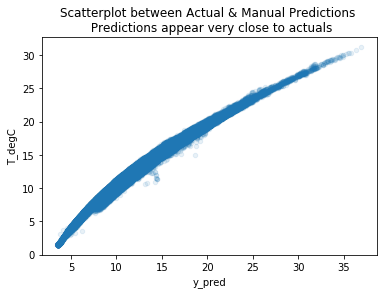

In [22]:
y_test.plot(kind="scatter", x="y_pred", y="T_degC", alpha=.1,
            title="Scatterplot between Actual & Manual Predictions \n Predictions appear very close to actuals")

### Part D: Linear Regression Using sklearn API

To verify the manual calculations, the same work will be performed but, this time with Sci-Kit Learn functions. The regression coefficients and prediction values should be exact matches from the manual phase. As seen below, the intercept and slope coefficients are identical.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Temperature model intercept:", lin_reg.intercept_)
print("Temperature model coefficients for Salnty & STheta:", lin_reg.coef_)

To better compare the predictions, I carried over the manual predictions (y_pred) as a column in the test data frame so they could be reviewed against the Sci-Kit Learn values (y_pred_sklearn). The first ten rows below show an exact match.

In [42]:
y_test["y_pred_sklearn"] = lin_reg.predict(X_test)

y_test.head(10)

,T_degC,y_pred,y_pred_sklearn
492273,4.210,5.090026,5.090026
14726,15.610,16.161555,16.161555
151483,10.340,10.163287,10.163287
649612,17.200,17.357932,17.357932
360161,12.130,11.541649,11.541649
623468,6.290,6.673322,6.673322
230821,12.990,11.740175,11.740175
133364,6.090,6.242256,6.242256
832921,11.691,11.578685,11.578685
603506,9.650,9.428450,9.428450


Verifying all the predictions was essential though, so I constructed a logical test to see if the values were congruent. The print out shows perfect alignment.

In [44]:
pred_matching = y_test["y_pred"].round(4) == y_test["y_pred_sklearn"].round(4)

print("Total number of prediction matches:", pred_matching.sum(), "which is", 
      pred_matching.sum() / len(pred_matching) * 100, "percent of cases")

Total number of prediction matches: 203042 which is 100.0 percent of cases


Given the indentical coefficients and predictions, the evaluation metrics should also match. Below, this is confirmed. 

In [25]:
print("Temperature prediction model R2:", metrics.r2_score(y_test["T_degC"], y_test["y_pred_sklearn"]).round(3))
print("Temperature prediction model MSE:", metrics.mean_squared_error(y_test["T_degC"], y_test["y_pred_sklearn"]).round(3))
print("Temperature prediction variance explanation:", 
      metrics.r2_score(y_test["T_degC"], y_test["y_pred_sklearn"]).round(4) * 100, "percent"
     )

Temperature prediction model R2: 0.987
Temperature prediction model MSE: 0.234
Temperature prediction variance explanation: 98.68 percent


The actuals versus prediction plot is also indentical.

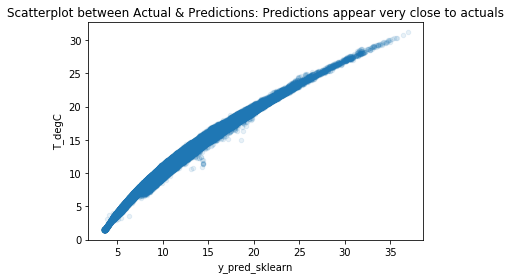

In [26]:
y_test.plot(kind="scatter", x="y_pred_sklearn", y="T_degC", alpha=.1,
            title="Scatterplot between Actual & Predictions: Predictions appear very close to actuals")

### Part E: Conceptual Questions

#### Why is it important to have a test set?

Test sets are essential because they enable a model’s generalizability to be examined. Whether working on an inferential or predictive problem, having a train and test split allows a model to be used on new, unseen data so its metrics and parameters can be gauged. If the training results are not broadly duplicated in test, this signals that there might be issues with the model construction. For example, if a regression model shows 95% accuracy in train and falls to 50% in test, there are clear signs of overfitting. However, without the data split approach, the model looks excellent given 95% appears to be a very good result. This highlights that developing a model without train and test does not provide insight into how the model will work on new cases, which is a dangerous scenario because a model might be suffer from over or underfitting, or generally be poor. Without this, any model deficiencies cannot be diagnosed and remedied.

#### If the normal equation always provides a solution, when would we not want to use it?

The normal equation, which provides the intercept and slope coefficients for a linear regression model, has underlying statistical assumptions that need to be met for the method to be optimal. Probably the most important assumption for validating whether to use the normal equation is whether the relationship between the predictors and outcome is linear. During an exploratory analysis, if there are clear bends and curves when evaluating predictors versus the outcome variable, the relationship might be better captured by a non-parametric model. These models include no assumptions about the type of association between predictors and the outcome, so they are more suitable for cases where a linear relationship is not evident, or assumed. From a practical standpoint, the normal equation can be used in these cases but the model, which describes the relationship between predictors and the outcome, will inherently be suboptimal and therefore, other non-parametric options make sense.

Additionally, there are other factors that would limit normal equation use. These include working with a non-invertible matrix, which means there are more columns than rows. In practice, this is unlikely to occur but, there is a vresion of this called computational singular where an inverse cannot be calculated. From a computational standpoint, using the normal equation is slow because finding the inverse of a large matrix can be a resource drain. These additional contraints also limit the use of the normal equation in some situations.

#### How might we improve the fit of our models from Part C & D?

The included model shows an incredible fit so any improvements would likely be incremental. That said, I think the most effective approach would be adding new variables. There still some unexplained variance in the outcome variable so including a new predictor might help increase this (although adjusted $R^2$ would need to be evaluated because adding any new predictor inherently adds more variance explanation). My intuition here is that there might be a grouping variable to better contextualize the Salnty and STheta values since there histograms showed bimodal distributions, which may signal there two groups underlying these records. The inclusion of a new variable to capture this might help. A second course of action to adjust these distributions would be a transformation. However, when I worked through a model with log transformed variables, I didn't see any evaluation metric increases. As such, I think including a grouping variable or some other continuous numeric predictor might help improve the model.

#### Explain what bias is and what variance is in regards to the bias-variance tradeoff

Bias refers to how much a model prediction differs from the actual values, which is the error term. With this in mind, bias is linked to how accurate a model is one a given set of data. In a similar vein, variance refers to how much a model's predictions vary from one data set ot another thereby capturing its generalizability. For example, if a model shows 90% accuracy on one set, like in train, and then 50% in another, like a test, there is a wide variance. In this way, variance captures how much predictions for a one set change to the next.

These concepts are inherently linked because it's essentially a trade-off between maximizing one concept at the expense of the other. Reducing bias in one set might mean fitting a model that is too close to the given data, which in turn means it won't generalize so variance increasing. Conversely, if the model is too loosely fit, it might show high bias but then, lowered variance on a new set. Therefore, model building is about trying to find a reasonable accommodation of both bias and variance where train and test metrics are broadly aligned.

#### In a linear regression model, how might we reduce bias?

To reduce bias in a regression setting, which amounts to improving some evaluation metric like MSE, a good approach would be adding new features to improve the model capacity. Taking the problem I worked through here as an example, if the initial work was a simple regression between Salnty and temperature, adding STheta would reduce bias because it adds a relevant, correlated predictor to enhance the model capacity. While this approach has to be tempered because adding too many variables can often lead to overfitting, it does stand a viable option to reduce bias.

#### In a linear regression model, how might we reduce variance?

Reducing variance can be done in several ways, including reducing model capacity by removing predictors, adding more training data, and enhancing data quality in a given set (i.e. reducing noise). For example, if there is a noticeable drop off between train and test in prediction accuracy, this might be symptomatic of having fit the initial data too closely. To avoid this, getting rid of superfluous, redundant terms might help; using a stepwise regression function is always a good candidate here. Beyond that, the data can be improved by reducing noise through outlier removal or by accepting the model might not be right given the data on hand, which would necessitate adding more records.

In [48]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\Mark\\Machine Learning 1'